<a href="https://colab.research.google.com/github/navya-08/ML_LAB/blob/main/1BM22CS175_lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Random Forest on Iris Dataset (Accuracy Calculation)


In [ ]:
# Random Forest on Iris Dataset for Accuracy

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Classifier Accuracy: {accuracy:.4f}')


Random Forest Classifier Accuracy: 1.0000


## Random Forest on Iris Dataset (Visualization)

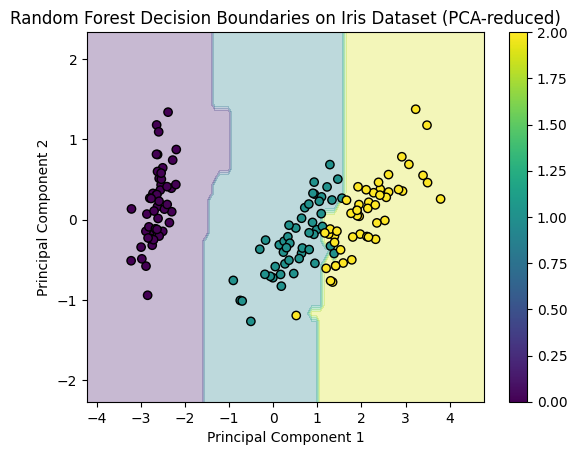

In [ ]:
# Random Forest on Iris Dataset with Visualization

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA for 2D visualization (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Initialize Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_pca, y)

# Create a mesh grid to plot decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', cmap='viridis')
plt.title('Random Forest Decision Boundaries on Iris Dataset (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()


## Random Forest on a Kaggle Dataset (Visualization)

<ipython-input-3-83c75d635039>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})  # Encode 'Sex' column as binary


Random Forest Classifier Accuracy on Titanic Dataset: 0.7860


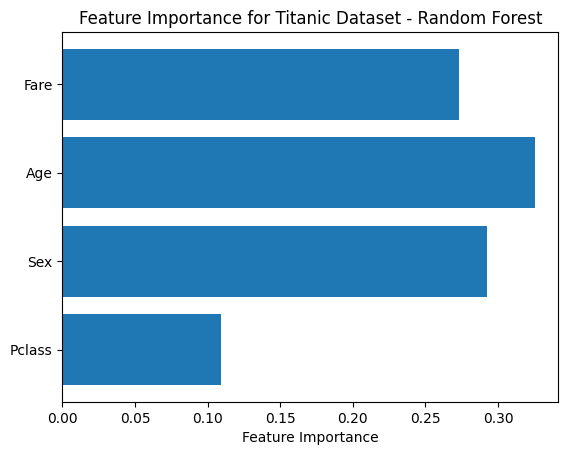

In [ ]:
# Random Forest on Kaggle Titanic Dataset with Visualization

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load Titanic dataset (Replace URL with the Kaggle Titanic dataset URL or local file)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Preprocessing: Select features and target variable
data = data.dropna(subset=['Survived', 'Pclass', 'Sex', 'Age', 'Fare'])  # Drop missing values
X = data[['Pclass', 'Sex', 'Age', 'Fare']]
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})  # Encode 'Sex' column as binary
y = data['Survived']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Classifier Accuracy on Titanic Dataset: {accuracy:.4f}')

# Feature importance visualization
importances = clf.feature_importances_
features = X.columns

# Plot feature importance
plt.barh(features, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Titanic Dataset - Random Forest')
plt.show()


## K-means on Iris Dataset (Accuracy Calculation)

In [ ]:
# K-means on Iris Dataset for Accuracy

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform K-means clustering (3 clusters for 3 species in Iris)
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Since K-means is an unsupervised algorithm, the cluster labels don't directly match the target labels
# To calculate accuracy, we map cluster labels to actual species labels
# Here we assume that the true labels are known and compare them with the clusters' output

# We use the mode (most frequent) of the true class labels for each cluster to match them
from scipy.stats import mode
cluster_labels = np.zeros_like(y_kmeans)
for i in range(3):  # 3 clusters
    mask = (y_kmeans == i)
    cluster_labels[mask] = mode(y[mask])[0]

# Calculate accuracy by comparing the mapped cluster labels with true labels
accuracy = accuracy_score(y, cluster_labels)
print(f'K-means Clustering Accuracy on Iris Dataset: {accuracy:.4f}')


K-means Clustering Accuracy on Iris Dataset: 0.8867


## K-means on Iris Dataset (Visualization)

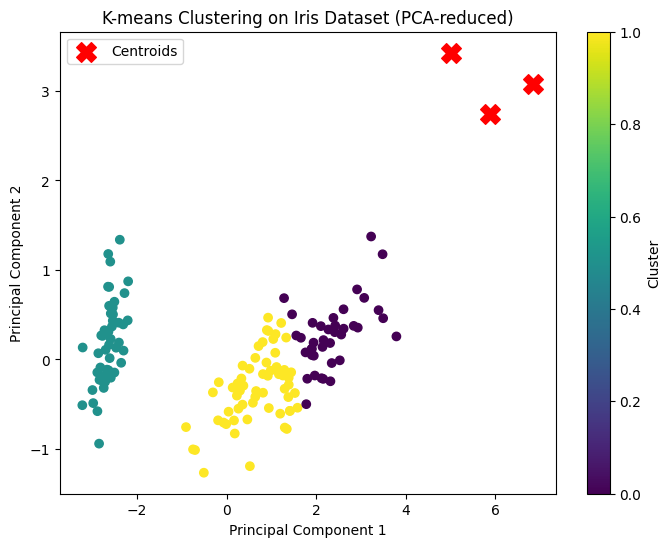

In [ ]:
# K-means on Iris Dataset with Visualization

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA for 2D visualization (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform K-means clustering (3 clusters for 3 species in Iris)
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualize the clustering result in 2D (PCA-reduced space)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering on Iris Dataset (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


##  K-means on a Kaggle Dataset (Visualization)

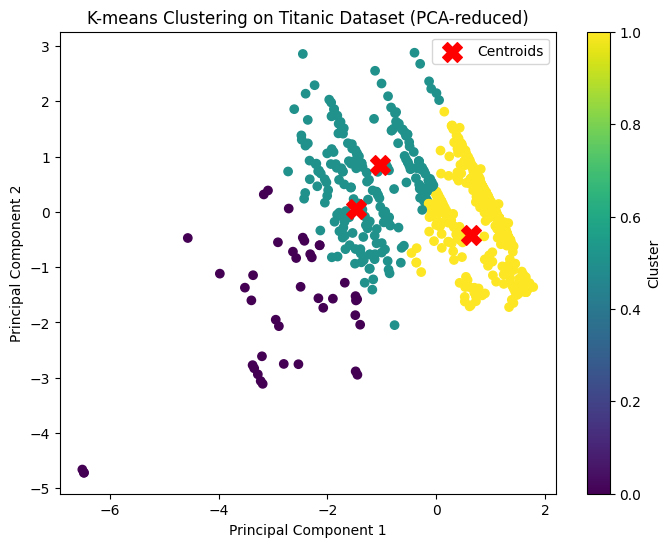

In [ ]:
# K-means on Kaggle Titanic Dataset with Visualization

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load Titanic dataset (You can replace the URL with your own Kaggle dataset link)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Preprocessing: Selecting relevant features and dropping missing values
data = data.dropna(subset=['Pclass', 'Age', 'Fare'])
X = data[['Pclass', 'Age', 'Fare']]

# Normalize the data (optional, but helps with clustering)
X = (X - X.mean()) / X.std()

# Apply K-means clustering (let's assume we use 3 clusters for this example)
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Apply PCA for 2D visualization (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering on Titanic Dataset (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


##  Boosting Ensemble (Gradient Boosting) on Iris Dataset (Accuracy Calculation)

In [ ]:
# Gradient Boosting on Iris Dataset for Accuracy

from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_clf.fit(X_train, y_train)

# Make predictions
y_pred = gb_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Gradient Boosting Classifier Accuracy on Iris Dataset: {accuracy:.4f}')


Gradient Boosting Classifier Accuracy on Iris Dataset: 1.0000


##  Boosting Ensemble (XGBoost) on Iris Dataset (Visualization)

XGBoost Classifier Accuracy on Iris Dataset: 1.0000


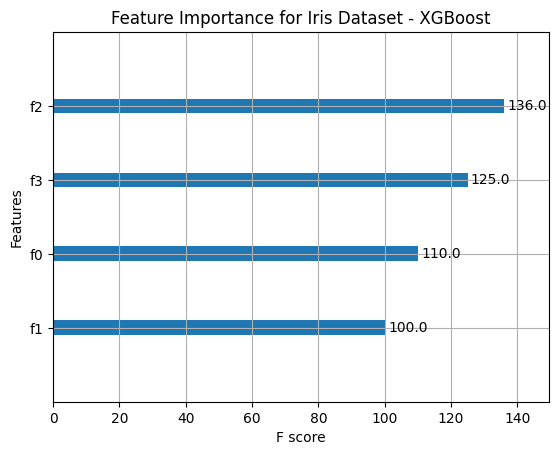

In [ ]:
# XGBoost on Iris Dataset with Feature Importance Visualization

import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize XGBoost Classifier
xgb_clf = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Train the model
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)

# Calculate accuracy
accuracy = (y_pred == y_test).mean()
print(f'XGBoost Classifier Accuracy on Iris Dataset: {accuracy:.4f}')

# Feature importance visualization
xgb.plot_importance(xgb_clf, importance_type='weight', max_num_features=10)
plt.title('Feature Importance for Iris Dataset - XGBoost')
plt.show()


## Boosting Ensemble (XGBoost) on Kaggle Dataset (Visualization)

XGBoost Classifier Accuracy on Titanic Dataset: 0.7767


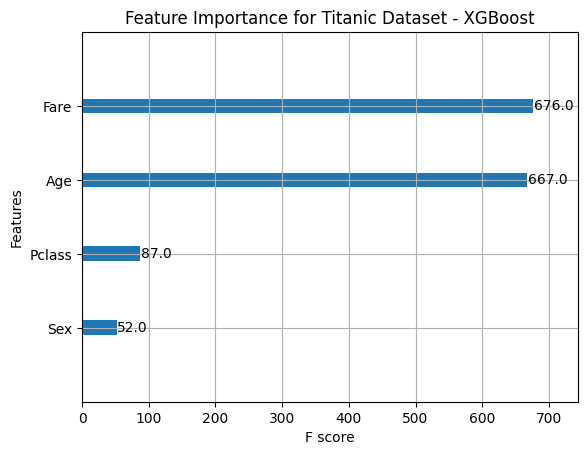

In [ ]:
# XGBoost on Kaggle Titanic Dataset with Feature Importance Visualization

import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load Titanic dataset (Replace with your dataset URL or local file path)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Preprocess the dataset: Handle missing values and encode categorical features
data = data.dropna(subset=['Survived', 'Pclass', 'Sex', 'Age', 'Fare'])

# Encode categorical 'Sex' feature
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

# Select features and target variable
X = data[['Pclass', 'Sex', 'Age', 'Fare']]
y = data['Survived']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize XGBoost Classifier
xgb_clf = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Train the model
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)

# Calculate accuracy
accuracy = (y_pred == y_test).mean()
print(f'XGBoost Classifier Accuracy on Titanic Dataset: {accuracy:.4f}')

# Feature importance visualization
xgb.plot_importance(xgb_clf, importance_type='weight', max_num_features=10)
plt.title('Feature Importance for Titanic Dataset - XGBoost')
plt.show()


## PCA on Iris Dataset (Accuracy Calculation)

In [ ]:
# PCA on Iris Dataset for Accuracy

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA to reduce data to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy after PCA on Iris Dataset: {accuracy:.4f}')


Accuracy after PCA on Iris Dataset: 1.0000


## PCA on Iris Dataset (Visualization)

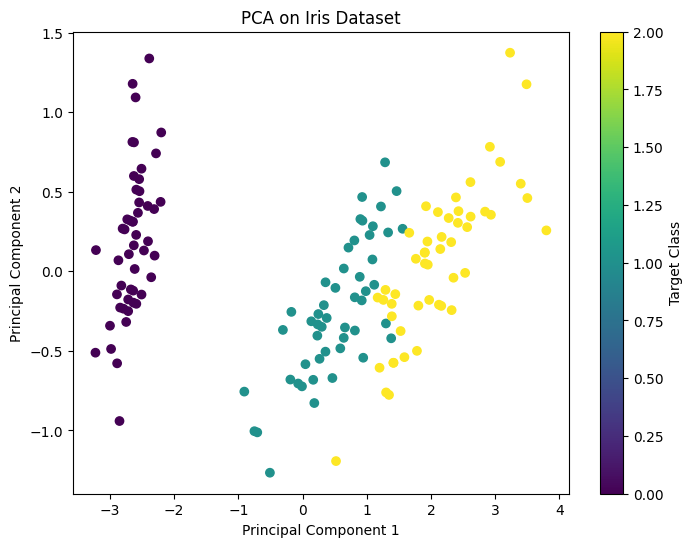

In [ ]:
# PCA on Iris Dataset with Visualization

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA to reduce data to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the PCA-reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target Class')
plt.show()


## PCA on a Kaggle Dataset (Visualization)

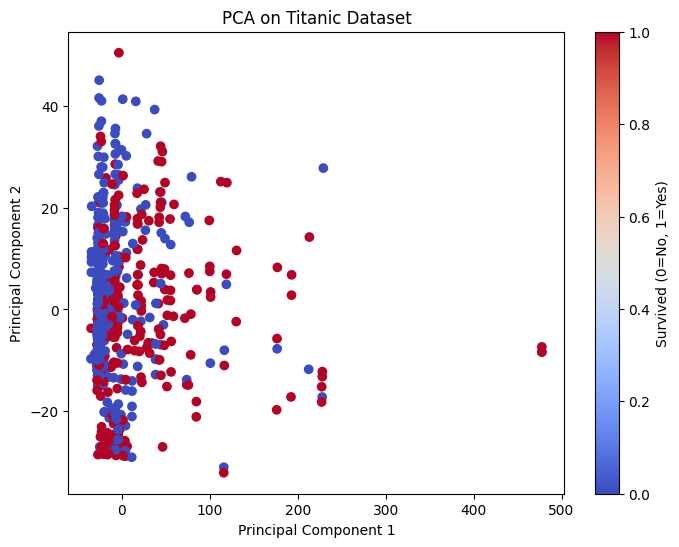

In [ ]:
# PCA on Kaggle Titanic Dataset with Visualization

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Load Titanic dataset (Replace with your dataset URL or local file path)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Preprocess the dataset: Handle missing values and encode categorical features
data = data.dropna(subset=['Pclass', 'Age', 'Fare'])
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])

# Select relevant features
X = data[['Pclass', 'Age', 'Fare']]
y = data['Survived']

# Apply PCA to reduce data to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the PCA-reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm')
plt.title('PCA on Titanic Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Survived (0=No, 1=Yes)')
plt.show()
